In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
dataFrame = pd.read_excel('merc.xlsx')

In [3]:
#tax vergi , mpg mil de ne kadar yaktığı 

In [4]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [5]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [6]:
#yukarida data ile ilgili belli başlı bilgiler vardir,
#datanin genel ozelliklerini gormek icin yapılsa iyi olur,
#yukarida 13 bin kusur data vardir,
#ortalama , standartsapma, minimum, maximum degerler

In [7]:
#bos veri var mi yok mu kontrol edip onlari doldurmaliyiz

In [9]:
dataFrame.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

In [10]:
#verilerimizde eksik yok kontrol ettik

## #veimizi gorsellestirip verimizi inceleyelim

C:\Users\Yigit\anaconda3\envs\asds\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

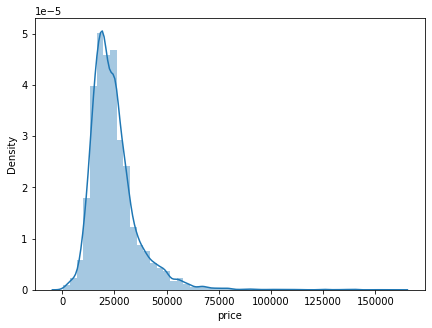

In [12]:

plt.figure(figsize = (7,5))
sbn.distplot(dataFrame['price'])

C:\Users\Yigit\anaconda3\envs\asds\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year', ylabel='count'>

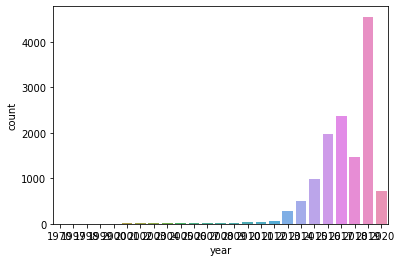

In [13]:
#hangi yillarda ne kadar araba var
sbn.countplot(dataFrame['year'])

In [14]:
#verilerin birbirileri arasindaki korelasyon
dataFrame.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [17]:
#sadece fiyatla ilgili olanlar
dataFrame.corr()['price'].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

In [18]:
#fiyati en cok etkileyen yil olarak gorunuyor
#engine size ve tax(vergi) de pozitif olarak etkiliyor
#en nagatif etkileyen mileage(araba kac km de)

<AxesSubplot:xlabel='mileage', ylabel='price'>

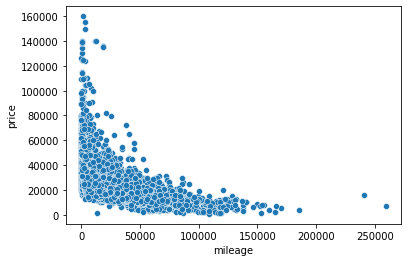

In [19]:
sbn.scatterplot(x = 'mileage', y = 'price', data = dataFrame)

In [20]:
#km arttikca fiyatin dustugunu goruyoruz

In [21]:
#verileri diz diyerek price i inceliyoruz 
#en yuksek fiyatli arabalari getirelim

In [23]:
dataFrame.sort_values('price', ascending = False).head(20)#pahalidan ucuza

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [24]:
dataFrame.sort_values('price', ascending = True).head(20)#ucuzdan pahaliya

,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11174,2001,1695,Automatic,108800,325,31.7,3.2
12710,2006,1695,Automatic,153000,300,33.6,1.8
12766,2004,1780,Automatic,118000,265,41.5,2.2
12009,2007,1800,Automatic,84000,200,42.8,1.5
11764,1998,1990,Automatic,99300,265,32.1,2.3


In [25]:
len(dataFrame)

13119

In [26]:
#bir verinin %99 unu alirsaniz buyuk ihtimalle verinin yansittigi genel tabloyu bozmadan
#islemlerimize devam edebiliriz
#13 bin veriden 139 tane cikarirsam sikinti olmaz
#en yuksek fiyatli 131 araci bulup veriden atip veriyi duzenleyelim

In [27]:
len(dataFrame) * 0.01

131.19

## veri temizliği

In [29]:
#pahalidan ucuza listelenen sirada ilk 131 veriyi atla ve geri kalan hepsini al
yuzdeDoksanDokuzDf = dataFrame.sort_values('price', ascending = False).iloc[131:]

In [30]:
yuzdeDoksanDokuzDf.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


C:\Users\Yigit\anaconda3\envs\asds\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

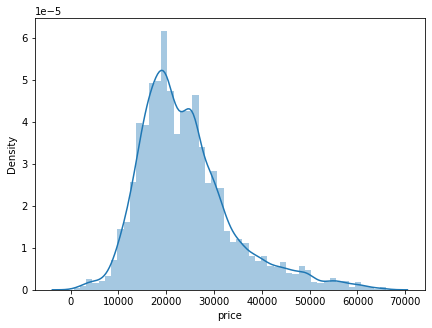

In [31]:
plt.figure(figsize =(7,5))
sbn.distplot(yuzdeDoksanDokuzDf['price'])

In [32]:
dataFrame.describe()#dataframe degismedi 

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [33]:
#yillara gore diz ve oratalamasini al
dataFrame.groupby('year').mean()['price']

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [34]:
yuzdeDoksanDokuzDf.groupby('year').mean()['price']

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [35]:
#1970 deki ozel veriyi datadan cikarma
dataFrame[dataFrame.year !=1970].groupby('year').mean()['price']

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [36]:
dataFrame = yuzdeDoksanDokuzDf
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [37]:
#gordugunuz gibi data azaldı

In [38]:
#datadan 1970 tekileride cikariyoruz
dataFrame = dataFrame[dataFrame.year != 1970]

In [39]:
dataFrame.groupby('year').mean()['price']

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [40]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


In [41]:
#regression isleminde hata almamak icin transmission dan kurtulmaliyiz
#sayisal bir deger tasimadigi icin
dataFrame = dataFrame.drop('transmission', axis = 1)

In [43]:
dataFrame.head()

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0


In [44]:
#veri temizligi bitti 

## regression modeli olusturma

In [45]:
#x ve y mizi belirleyelim  y = ulasmak istedigimiz sey fiyatlardi yani 'price'
# x dedigimizde geri kalanlar

In [46]:
#datalarimizi diziye cevirdik
y = dataFrame['price'].values
x = dataFrame.drop('price', axis=1).values

In [47]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [48]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=10)

In [51]:
#test edicegimiz x datasini degistiriyoruz 
len(x_train)

9090

In [52]:
len(x_test)

3897

In [53]:
from sklearn.preprocessing import MinMaxScaler 

In [54]:
#scaler i kullanarak istedigimiz gibi scale ediyoruz
scaler = MinMaxScaler()

In [55]:
x_train = scaler.fit_transform(x_train)

In [56]:
x_test = scaler.transform(x_test)

In [57]:
#fiyati scale etmemize gerek yok

In [58]:
from tensorflow.keras.models import Sequential#model olusturma
from tensorflow.keras.layers import Dense#katmanlari olusturma

In [59]:
x_train.shape #katmanlari sonucu iyi almak icin en az 5 secmeliyiz

(9090, 5)

In [60]:
model = Sequential()

model.add(Dense(12,activation = 'relu'))
model.add(Dense(12,activation = 'relu'))
model.add(Dense(12,activation = 'relu'))
model.add(Dense(12,activation = 'relu'))

#cikis katmani
model.add(Dense(1))

model.compile(optimizer = 'adam', loss= 'mse')



In [61]:
#modeli egitmeye basliyoruz
#validasyon verisini yani dogrulama verisini model icinde tensorflow yardimiyla verebiliyoruz
#egitilirken valide edilebiliyor 'validation_data = (x_test,y_test)'
#batch size ayari parti parti datalari verme 

In [62]:
model.fit(x = x_train, y = y_train, validation_data = (x_test,y_test),batch_size = 250, epochs = 300)

Epoch 1/300
37/37 [==============================] - 0s 4ms/step - loss: 672144064.0000 - val_loss: 688100800.0000
Epoch 2/300
37/37 [==============================] - 0s 1ms/step - loss: 672117056.0000 - val_loss: 688052608.0000
Epoch 3/300
37/37 [==============================] - 0s 1ms/step - loss: 672033216.0000 - val_loss: 687909760.0000
Epoch 4/300
37/37 [==============================] - 0s 1ms/step - loss: 671782464.0000 - val_loss: 687480064.0000
Epoch 5/300
37/37 [==============================] - 0s 1ms/step - loss: 671055360.0000 - val_loss: 686285952.0000
Epoch 6/300
37/37 [==============================] - 0s 1ms/step - loss: 669164736.0000 - val_loss: 683350976.0000
Epoch 7/300
37/37 [==============================] - 0s 1ms/step - loss: 664803904.0000 - val_loss: 676898176.0000
Epoch 8/300
37/37 [==============================] - 0s 1ms/step - loss: 655753152.0000 - val_loss: 664183616.0000
Epoch 9/300
37/37 [==============================] - 0s 1ms/step - loss: 6388565

37/37 [==============================] - 0s 1ms/step - loss: 42301500.0000 - val_loss: 43355260.0000
Epoch 73/300
37/37 [==============================] - 0s 1ms/step - loss: 41440384.0000 - val_loss: 42501300.0000
Epoch 74/300
37/37 [==============================] - 0s 1ms/step - loss: 40632108.0000 - val_loss: 41645748.0000
Epoch 75/300
37/37 [==============================] - 0s 1ms/step - loss: 39846592.0000 - val_loss: 40856268.0000
Epoch 76/300
37/37 [==============================] - 0s 1ms/step - loss: 39080236.0000 - val_loss: 40066708.0000
Epoch 77/300
37/37 [==============================] - 0s 1ms/step - loss: 38342312.0000 - val_loss: 39286620.0000
Epoch 78/300
37/37 [==============================] - 0s 1ms/step - loss: 37639512.0000 - val_loss: 38533764.0000
Epoch 79/300
37/37 [==============================] - 0s 1ms/step - loss: 36930612.0000 - val_loss: 37811360.0000
Epoch 80/300
37/37 [==============================] - 0s 1ms/step - loss: 36266860.0000 - val_loss: 3

37/37 [==============================] - 0s 1ms/step - loss: 21631706.0000 - val_loss: 22697240.0000
Epoch 144/300
37/37 [==============================] - 0s 1ms/step - loss: 21568776.0000 - val_loss: 22717090.0000
Epoch 145/300
37/37 [==============================] - 0s 1ms/step - loss: 21577530.0000 - val_loss: 22639694.0000
Epoch 146/300
37/37 [==============================] - 0s 1ms/step - loss: 21495946.0000 - val_loss: 22692062.0000
Epoch 147/300
37/37 [==============================] - 0s 1ms/step - loss: 21464570.0000 - val_loss: 22596580.0000
Epoch 148/300
37/37 [==============================] - 0s 1ms/step - loss: 21441848.0000 - val_loss: 22611530.0000
Epoch 149/300
37/37 [==============================] - 0s 1ms/step - loss: 21474080.0000 - val_loss: 22660566.0000
Epoch 150/300
37/37 [==============================] - 0s 1ms/step - loss: 21415422.0000 - val_loss: 22562570.0000
Epoch 151/300
37/37 [==============================] - 0s 1ms/step - loss: 21387324.0000 - val

37/37 [==============================] - 0s 1ms/step - loss: 20618690.0000 - val_loss: 21922900.0000
Epoch 215/300
37/37 [==============================] - 0s 1ms/step - loss: 20591858.0000 - val_loss: 21910686.0000
Epoch 216/300
37/37 [==============================] - 0s 1ms/step - loss: 20568404.0000 - val_loss: 21899238.0000
Epoch 217/300
37/37 [==============================] - 0s 1ms/step - loss: 20581378.0000 - val_loss: 21932074.0000
Epoch 218/300
37/37 [==============================] - 0s 1ms/step - loss: 20568936.0000 - val_loss: 21906206.0000
Epoch 219/300
37/37 [==============================] - 0s 1ms/step - loss: 20557232.0000 - val_loss: 21869774.0000
Epoch 220/300
37/37 [==============================] - 0s 1ms/step - loss: 20575892.0000 - val_loss: 21990464.0000
Epoch 221/300
37/37 [==============================] - 0s 1ms/step - loss: 20520604.0000 - val_loss: 21849884.0000
Epoch 222/300
37/37 [==============================] - 0s 1ms/step - loss: 20537354.0000 - val

37/37 [==============================] - 0s 1ms/step - loss: 19989670.0000 - val_loss: 21489674.0000
Epoch 286/300
37/37 [==============================] - 0s 1ms/step - loss: 19984888.0000 - val_loss: 21358438.0000
Epoch 287/300
37/37 [==============================] - 0s 1ms/step - loss: 19951578.0000 - val_loss: 21354714.0000
Epoch 288/300
37/37 [==============================] - 0s 1ms/step - loss: 19948542.0000 - val_loss: 21371394.0000
Epoch 289/300
37/37 [==============================] - 0s 1ms/step - loss: 19976534.0000 - val_loss: 21410194.0000
Epoch 290/300
37/37 [==============================] - 0s 1ms/step - loss: 19988374.0000 - val_loss: 21376254.0000
Epoch 291/300
37/37 [==============================] - 0s 1ms/step - loss: 19939370.0000 - val_loss: 21345722.0000
Epoch 292/300
37/37 [==============================] - 0s 1ms/step - loss: 19911750.0000 - val_loss: 21315360.0000
Epoch 293/300
37/37 [==============================] - 0s 1ms/step - loss: 19915616.0000 - val

In [63]:
#her iki kayipverileri görsellestirelim

In [64]:
kayipVerisi = pd.DataFrame(model.history.history)

In [65]:
kayipVerisi.head()

,loss,val_loss
0,672144064.0,688100800.0
1,672117056.0,688052608.0
2,672033216.0,687909760.0
3,671782464.0,687480064.0
4,671055360.0,686285952.0


<AxesSubplot:>

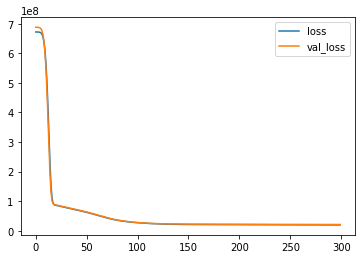

In [66]:
kayipVerisi.plot()

In [67]:
#cikan grafikte onemli olanlar (ikiside beraber hareket ederek 0 a yaklasıyor mu )
#epochs u cok verirsek over fitting durumu olusabilir
#(bunuda valu loss ile loss un ayrı davranıslar sergilemesi ile anlasilir)


In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [70]:
tahminDizisi = model.predict(x_test)

In [71]:
tahminDizisi

array([[21779.27 ],
       [22864.379],
       [25204.973],
       ...,
       [26630.398],
       [11378.603],
       [24699.158]], dtype=float32)

In [72]:
mean_absolute_error(y_test,tahminDizisi)

3284.367556122899

In [73]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [75]:
3284/24074

0.1364127274237767

In [76]:
#yuzde 13 oraninda bir sapma olabilir 
# %13 orani bizim icin yuksek mi yoksa yeterli mi bunu bilmeliyiz
#geri donup veriyi degistirebiliriz
#veriyi biraz daha temizleyebiliriz 
#test size ,split size oranimizi degistirebilirz
#epochs u arttirabiliriz
#noron sayimizi degistirebiliriz ve katman sayimizi degistirebiliriz
# ama overfitting e dusmemeliyiz

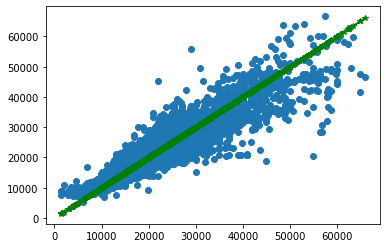

In [79]:
plt.scatter(y_test, tahminDizisi)
plt.plot(y_test,y_test, 'g-*')

In [80]:
dataFrame

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0
...,...,...,...,...,...,...
11549,2002,1495,13800,305,39.8,2.7
12594,2004,1495,119000,300,34.5,1.8
11765,2000,1490,87000,265,27.2,3.2
12008,2010,1350,116126,145,54.3,2.0


In [81]:
dataFrame.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [84]:
yeniArabaSeries = dataFrame.drop('price', axis=1).iloc[2]
#yukarda rastgele sectigimiz arabayi datadan cikartip
#yeni sectigimiz arabayi

In [85]:
type(yeniArabaSeries)

pandas.core.series.Series

In [86]:
yeniArabaSeries = scaler.transform(yeniArabaSeries.values.reshape(-1,5))

In [87]:
model.predict(yeniArabaSeries)

array([[61519.668]], dtype=float32)

In [88]:
#tahmin etmeye calisiyoruz ve burada gordugumuz gibi 65980.0 olan arabayi bize 61519 price olarak buldu